### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# This section of the code investigates the dataset for missing or problematic data.

# This prints the total number of missing values in each column of the dataset
print(data.isnull().sum())

# The output shows that the 'car' column has 12,576 missing values, while other columns like 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' have a smaller number of missing values.


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


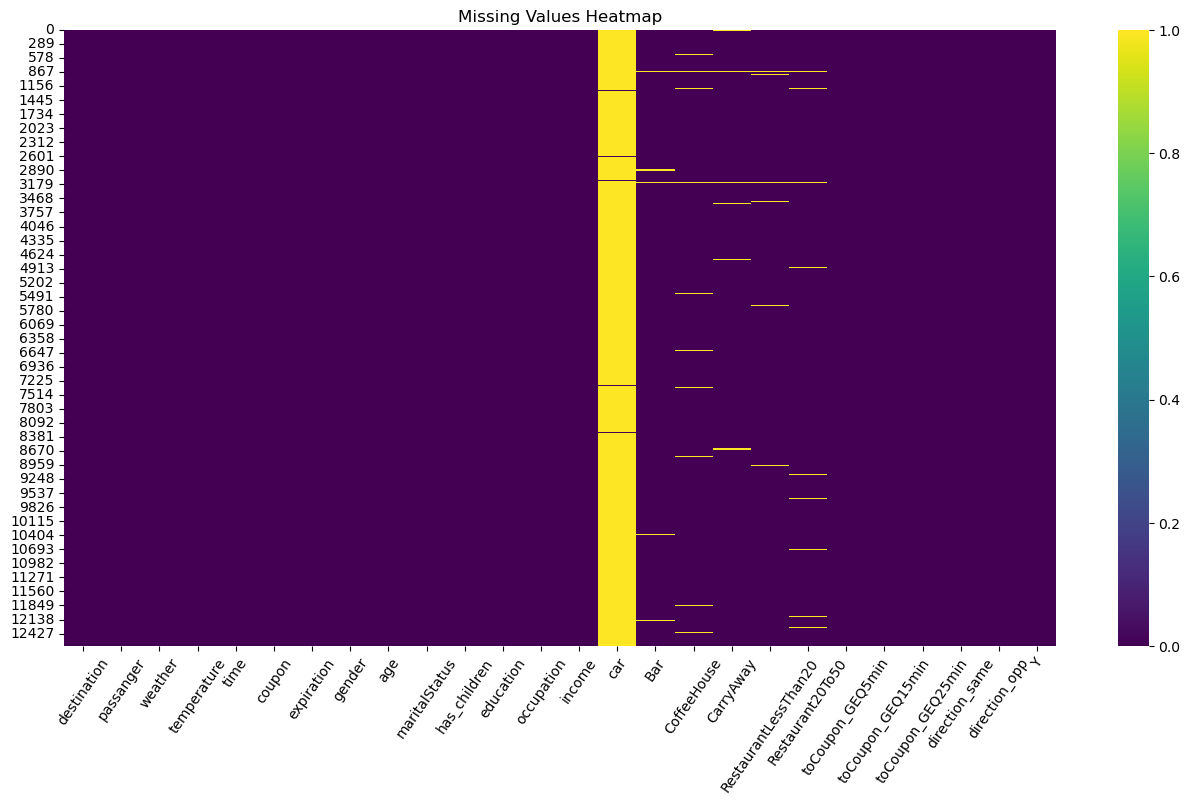

In [5]:
# Overview of missing values using a heatmap
plt.figure(figsize=(16, 8)) # Set the figure size
sns.heatmap(data.isnull(), cmap='viridis') # Create a heatmap to visualize missing values
plt.title('Missing Values Heatmap') # Set the title of the heatmap
plt.xticks(rotation=55) # Rotate the x-axis labels for better readability
plt.show() # Display the heatmap

# This part of the code creates a heatmap to visualize the missing values in the dataset.
# The heatmap provides a graphical representation of the missing data, making it easier to identify columns with significant amounts of missing data.

# Observation:
# - The 'car' column has a substantial number of missing values (12,576), which could affect analysis.
# - Other columns such as 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' have missing values but to a lesser extent.
# - The heatmap clearly highlights the columns with missing data, allowing for a quick visual assessment of where data cleaning or imputation is needed.

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# This section of the code deals with missing data in the dataset.

# Step 1: Dropping the 'car' column
# The 'car' column has a high number of missing values (12,576), making it difficult to impute values accurately.
# Dropping this column removes the problematic data and simplifies the dataset.
data_cleaned = data.drop(columns=['car'])

# Step 2: Filling missing values in categorical columns
# For columns like 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50', missing values are filled with the mode.
# The mode is the most frequent value in the column, which helps to preserve the original data distribution and is a simple yet effective imputation method for categorical data.
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column] = data_cleaned[column].fillna(mode_value) # Avoid pandas 3.0 futureWarning

# After performing these steps, the dataset is cleaned of missing values, as confirmed by the output of the isnull().sum() method.
print("Missing values after cleaning:\n\n", data_cleaned.isnull().sum())

Missing values after cleaning:

 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


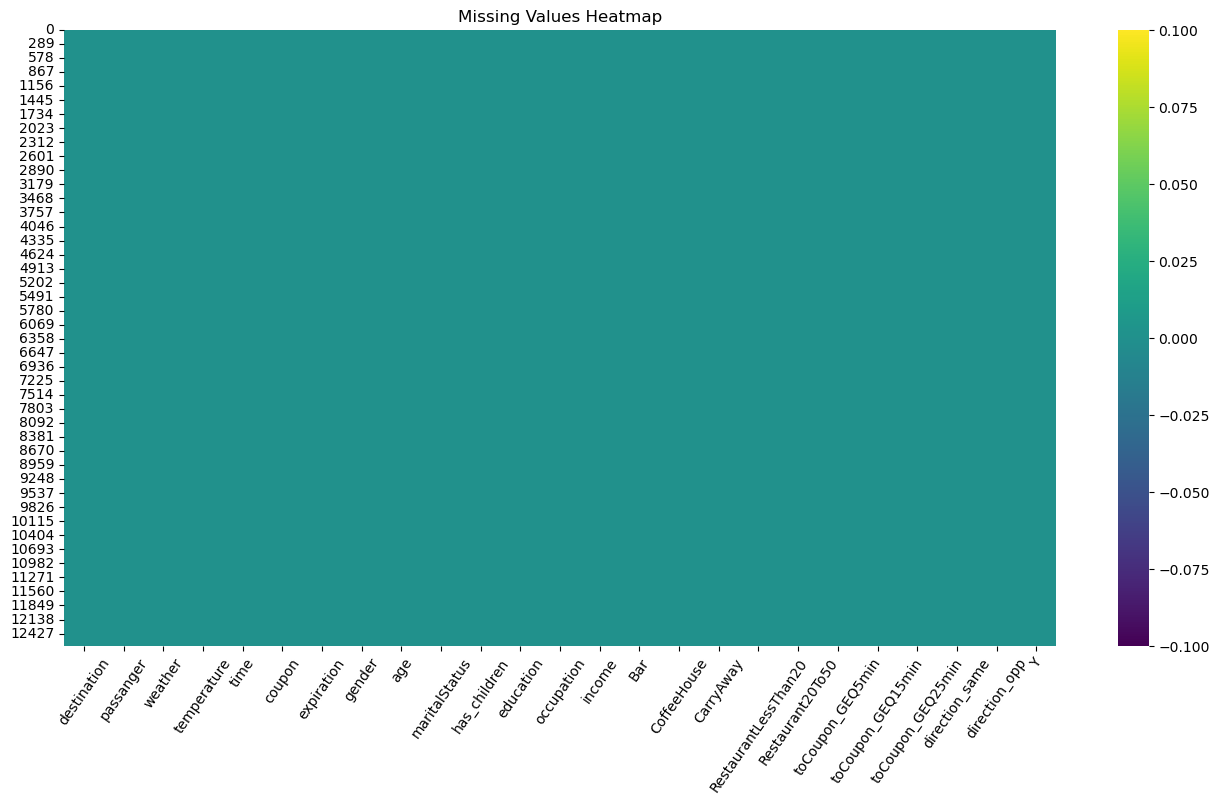

In [7]:
# This heatmap visualizes the dataset after handling missing data.
plt.figure(figsize=(16, 8)) # Set the figure size
sns.heatmap(data_cleaned.isnull(), cmap='viridis') # Create a heatmap to visualize missing values
plt.title('Missing Values Heatmap') # Set the title of the heatmap
plt.xticks(rotation=55) # Rotate the x-axis labels for better readability
plt.show() # Display the heatmap

# Observation:
# - The 'car' column, which had a high number of missing values, was dropped, simplifying the dataset.
# - Missing values in categorical columns like 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' were filled using the mode.
# - The heatmap now shows that all columns have complete data with no missing values.

4. What proportion of the total observations chose to accept the coupon? 



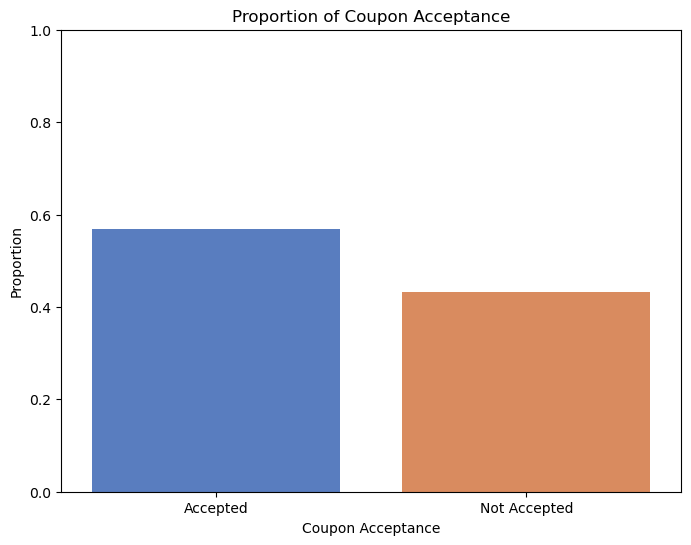

The proportion of total observations that accepted the coupon is: 57%


In [8]:
# Analysis of the Proportion of Coupon Acceptance

# This section of the code calculates the proportion of observations that accepted the coupon.

# The calculation is done by taking the mean of the 'Y' column, which is binary (0 or 1).
# The mean of a binary variable represents the proportion of 1s in the dataset.
coupon_acceptance_rate = data_cleaned['Y'].mean()

# Create a DataFrame for visualization
acceptance_data = pd.DataFrame({
    'Coupon Acceptance': ['Accepted', 'Not Accepted'],
    'Proportion': [coupon_acceptance_rate, 1 - coupon_acceptance_rate]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Coupon Acceptance', y='Proportion', data=acceptance_data, palette='muted')
plt.title('Proportion of Coupon Acceptance')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()

# Display the proportion with a formatted string
print(f"The proportion of total observations that accepted the coupon is: {round(coupon_acceptance_rate * 100)}%")

# Observation:
# - The acceptance rate of 57% suggests a majority interest in the coupon among the surveyed individuals.
# - Visualizing the acceptance rate provides a clear and immediate understanding of the overall acceptance.

5. Use a bar plot to visualize the `coupon` column.

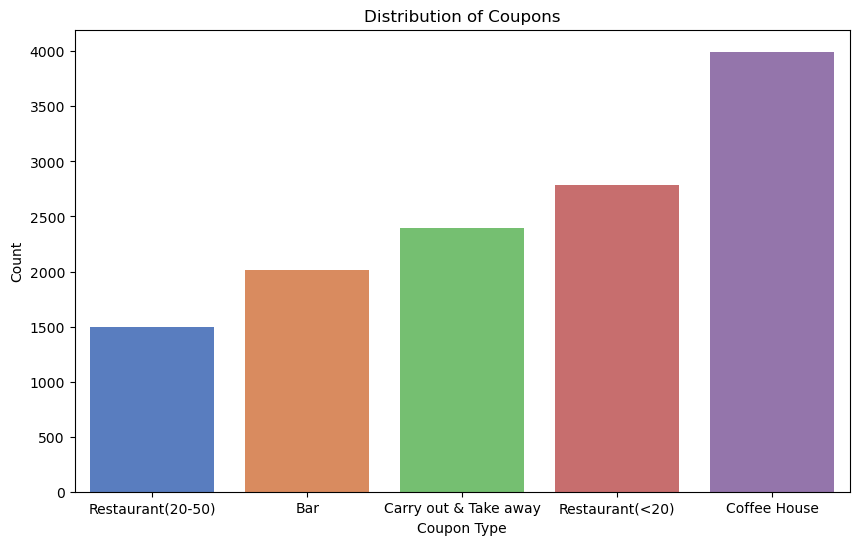

In [9]:
# This section of the code calculates and visualizes the distribution of different types of coupons in the dataset.

# Step 1: Calculate the counts of each unique value in the 'coupon' column and sort them
# The counts are calculated using the value_counts() method, and the results are sorted and reset to index to create a DataFrame.
coupon_counts = data_cleaned['coupon'].value_counts().sort_values().reset_index()
coupon_counts.columns = ['coupon', 'count']

# Step 2: Create a bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='coupon', y='count', data=coupon_counts, palette='muted')  # Create a bar plot with sorted counts
plt.title('Distribution of Coupons')  # Set the title of the plot
plt.xlabel('Coupon Type')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot

# Observation:
# - The 'Coffee House' coupon type has the highest count, indicating it is the most frequently offered coupon.
# - The 'Restaurant(20-50)' coupon type has the lowest count, making it the least frequently offered coupon.
# - The other coupon types ('Bar', 'Carry out & Take away', 'Restaurant(<20)') have moderate counts, with 'Carry out & Take away' being more common than 'Bar' and 'Restaurant(<20)'.

6. Use a histogram to visualize the temperature column.

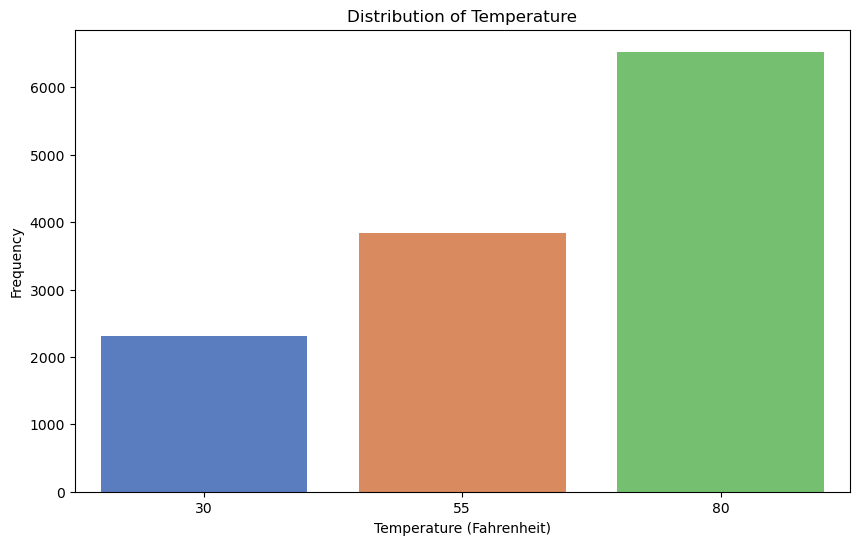

In [10]:
# This section of the code creates a histogram to visualize the distribution of the 'temperature' column.

# Count the occurrences of each unique temperature value
temperature_counts = data_cleaned['temperature'].value_counts().reset_index()
temperature_counts.columns = ['temperature', 'count']

# Create a bar plot to visualize the distribution of the 'temperature' column
plt.figure(figsize=(10, 6))  # Set the size of the figure to 10x6 inches
sns.barplot(x='temperature', y='count', data=temperature_counts, palette='muted')  # Create a bar plot for temperature
plt.title('Distribution of Temperature')  # Set the title of the plot
plt.xlabel('Temperature (Fahrenheit)')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot

# Observation:
# - The bar plot reveals that temperatures of 30°F, 55°F, and 80°F are common in the dataset.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
# Filter the DataFrame to include only rows where the 'coupon' column is related to bars
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame to verify the filtering
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


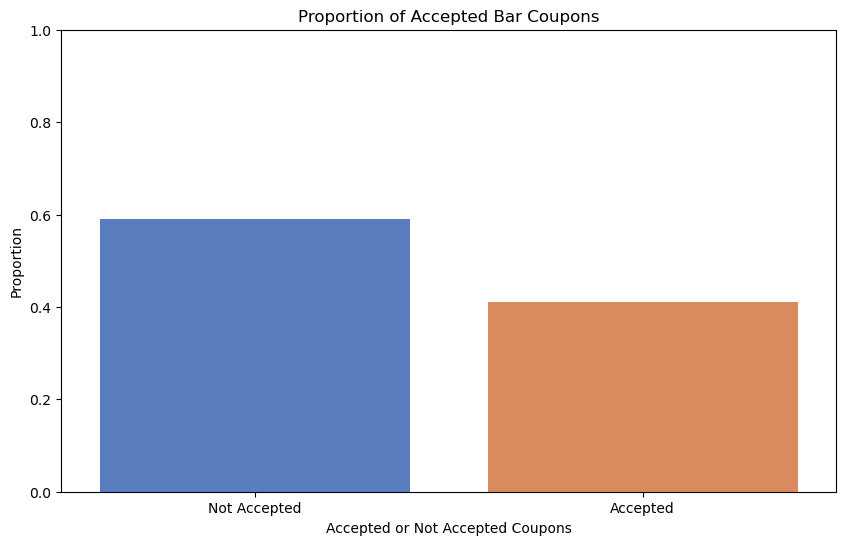

The proportion of bar coupons that were accepted is: 41%


In [12]:
# This section of the code calculates and visualizes the proportion of bar coupons that were accepted.

# Step 1: Calculate the proportion of bar coupons that were accepted
# The mean of the 'Y' column in the bar coupons DataFrame is calculated to determine the proportion of accepted bar coupons.
bar_coupons_accepted_rate = bar_coupons_df['Y'].mean()

# Step 2: Calculate the counts for accepted and not accepted bar coupons
# The value_counts() method is used to count the occurrences of accepted (1) and not accepted (0) bar coupons.
bar_coupons_counts = bar_coupons_df['Y'].value_counts(normalize=True).reset_index()
bar_coupons_counts.columns = ['Accepted', 'Proportion']

# Step 3: Create a bar plot for the acceptance of bar coupons
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x='Accepted', y='Proportion', data=bar_coupons_counts, palette='muted')  # Create a bar plot
plt.title('Proportion of Accepted Bar Coupons')  # Set the title of the plot
plt.xlabel('Accepted or Not Accepted Coupons')  # Set the label for the x-axis
plt.ylabel('Proportion')  # Set the label for the y-axis
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])  # Set the x-axis tick labels
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 to represent proportions
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()  # Display the plot

# Step 4: Display the proportion
print(f"The proportion of bar coupons that were accepted is: {round(bar_coupons_accepted_rate * 100)}%")

# Observation:
# - The bar plot visually represents the proportions of accepted and not accepted bar coupons, making it easy to see the difference.
# - The majority of bar coupons were not accepted, with the acceptance rate being 41%.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


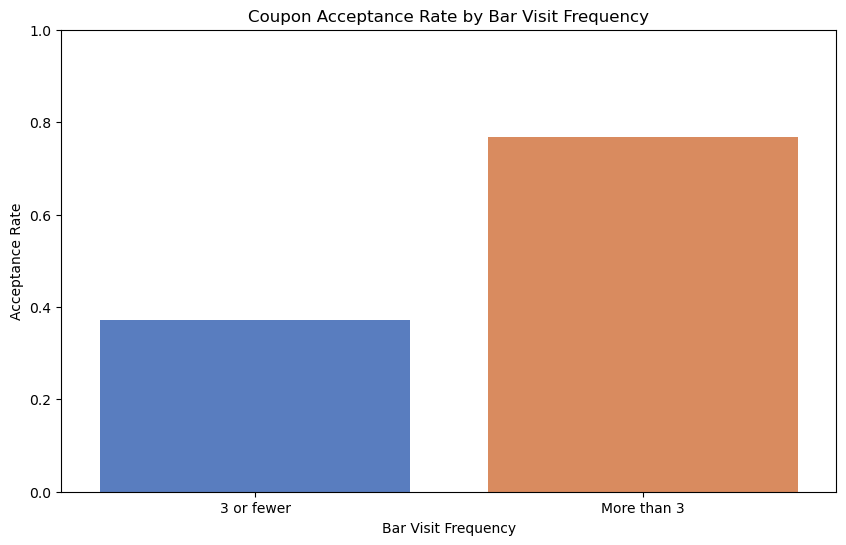

Acceptance rate for those who went to a bar 3 or fewer times a month: 37%
Acceptance rate for those who went to a bar more than 3 times a month: 77%


In [13]:
# Create two separate DataFrames based on the frequency of bar visits
bar_visits_3_or_less = bar_coupons_df.query('Bar in ["never", "less1", "1~3"]')
bar_visits_more_than_3 = bar_coupons_df.query('~(Bar in ["never", "less1", "1~3"])')

# Calculate the acceptance rate for each group
acceptance_rate_3_or_less = bar_visits_3_or_less['Y'].mean()
acceptance_rate_more_than_3 = bar_visits_more_than_3['Y'].mean()

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Bar Visits': ['3 or fewer', 'More than 3'],
    'Acceptance Rate': [acceptance_rate_3_or_less, acceptance_rate_more_than_3]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Bar Visits', y='Acceptance Rate', data=acceptance_rates, palette='muted')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()

# Display the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {round(acceptance_rate_3_or_less * 100)}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {round(acceptance_rate_more_than_3 * 100)}%")

# The first bar represents the acceptance rate for the first group, which is approximately 37%.
# The second bar represents the acceptance rate for the second group, which is approximately 77%.

# Observation:
# - The acceptance rate for the second group (more than 3 times a month) is significantly higher than that of the first group (3 or fewer times a month).
# - This suggests that drivers who frequent bars more often are more likely to accept coupons.
# - The difference in acceptance rates indicates that the frequency of bar visits positively influences the likelihood of coupon acceptance.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


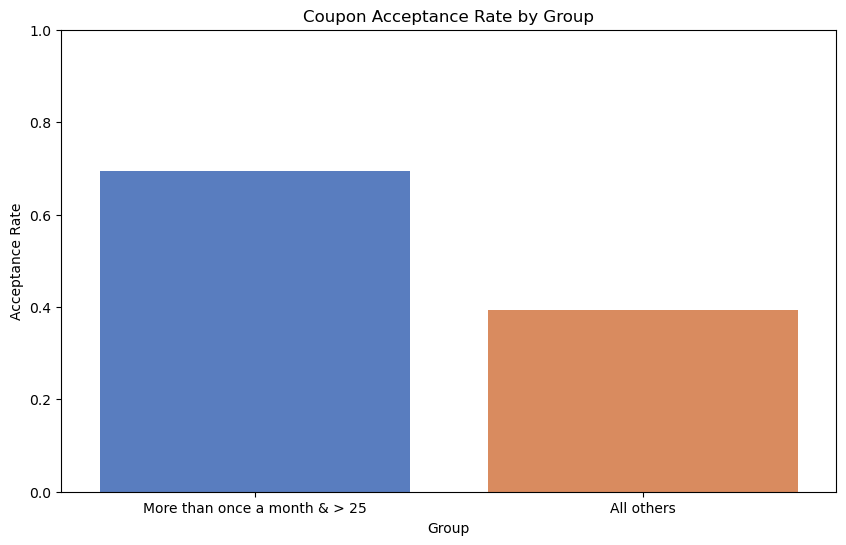

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 70%
Acceptance rate for all other drivers: 39%


In [14]:
# Create a DataFrame for drivers who go to a bar more than once a month and are over the age of 25
group_1 = bar_coupons_df.query('(Bar in ["1~3", "4~8", "gt8"]) & (age in ["26", "31", "36", "41", "46", "50plus"])')

# Create a DataFrame for all other drivers
group_2 = bar_coupons_df.query('~(Bar in ["1~3", "4~8", "gt8"]) & ~(age in ["26", "31", "36", "41", "46", "50plus"])')

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Group': ['More than once a month & > 25', 'All others'],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette='muted')
plt.title('Coupon Acceptance Rate by Group')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

# Display the acceptance rates
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {round(acceptance_rate_group_1 * 100)}%")
print(f"Acceptance rate for all other drivers: {round(acceptance_rate_group_2 * 100)}%")

# The first bar represents the acceptance rate for the first group, which is approximately 70%.
# The second bar represents the acceptance rate for all other drivers, which is approximately 39%.

# Observation:
# - The acceptance rate for the first group is significantly higher than that of the second group.
# - This suggests that drivers who go to a bar more than once a month and are over the age of 25 are more likely to accept coupons.
# - The difference in acceptance rates indicates that these specific characteristics (frequent bar visits and age over 25) positively influence the likelihood of coupon acceptance.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


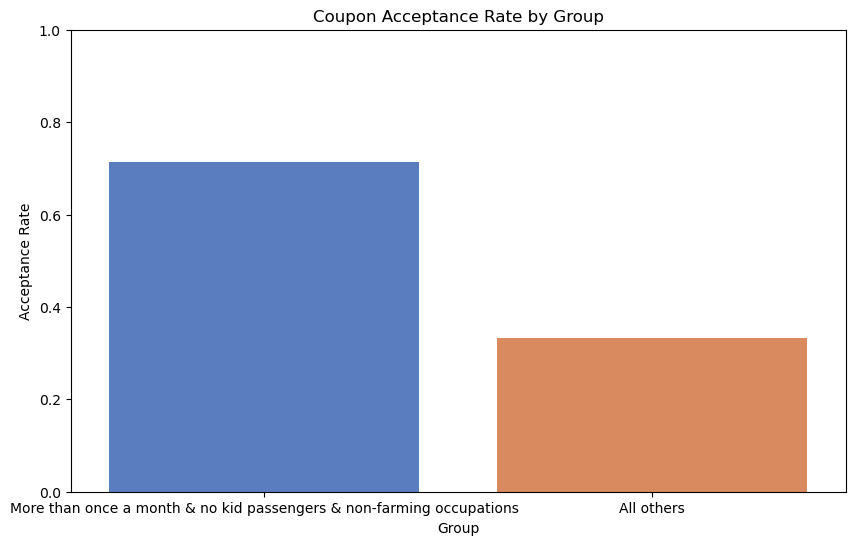

Acceptance rate for drivers who go to a bar more than once a month, have passangers that are not kids, and have occupations other than farming, fishing, or forestry: 71%
Acceptance rate for all other drivers: 33%


In [15]:
# Create a DataFrame for drivers who go to a bar more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry
group_1 = bar_coupons_df.query('(Bar in ["1~3", "4~8", "gt8"]) & (passanger != "Kid(s)") & (occupation != "Farming Fishing & Forestry")')

# Create a DataFrame for all other drivers
group_2 = bar_coupons_df.query('~(Bar in ["1~3", "4~8", "gt8"]) & ~(passanger != "Kid(s)") & ~(occupation != "Farming Fishing & Forestry")')

# # Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# # Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Group': ['More than once a month & no kid passengers & non-farming occupations', 'All others'],
    'Acceptance Rate': [acceptance_rate_group_1, acceptance_rate_group_2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette='muted')
plt.title('Coupon Acceptance Rate by Group')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 to represent proportions
plt.show()

# # Display the acceptance rates as percentages
print(f"Acceptance rate for drivers who go to a bar more than once a month, have passangers that are not kids, and have occupations other than farming, fishing, or forestry: {round(acceptance_rate_group_1 * 100)}%")
print(f"Acceptance rate for all other drivers: {round(acceptance_rate_group_2 * 100)}%")

# The first bar represents the acceptance rate for the first group, which is approximately 71%.
# The second bar represents the acceptance rate for all other drivers, which is approximately 33%.

# Observation:
# - The acceptance rate for the first group is significantly higher than that of the second group.
# - This suggests that drivers who go to bars more than once a month, have passengers who are not kids, and have occupations other than farming, fishing, or forestry are more likely to accept coupons.
# - The difference in acceptance rates indicates that these specific characteristics positively influence the likelihood of coupon acceptance.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



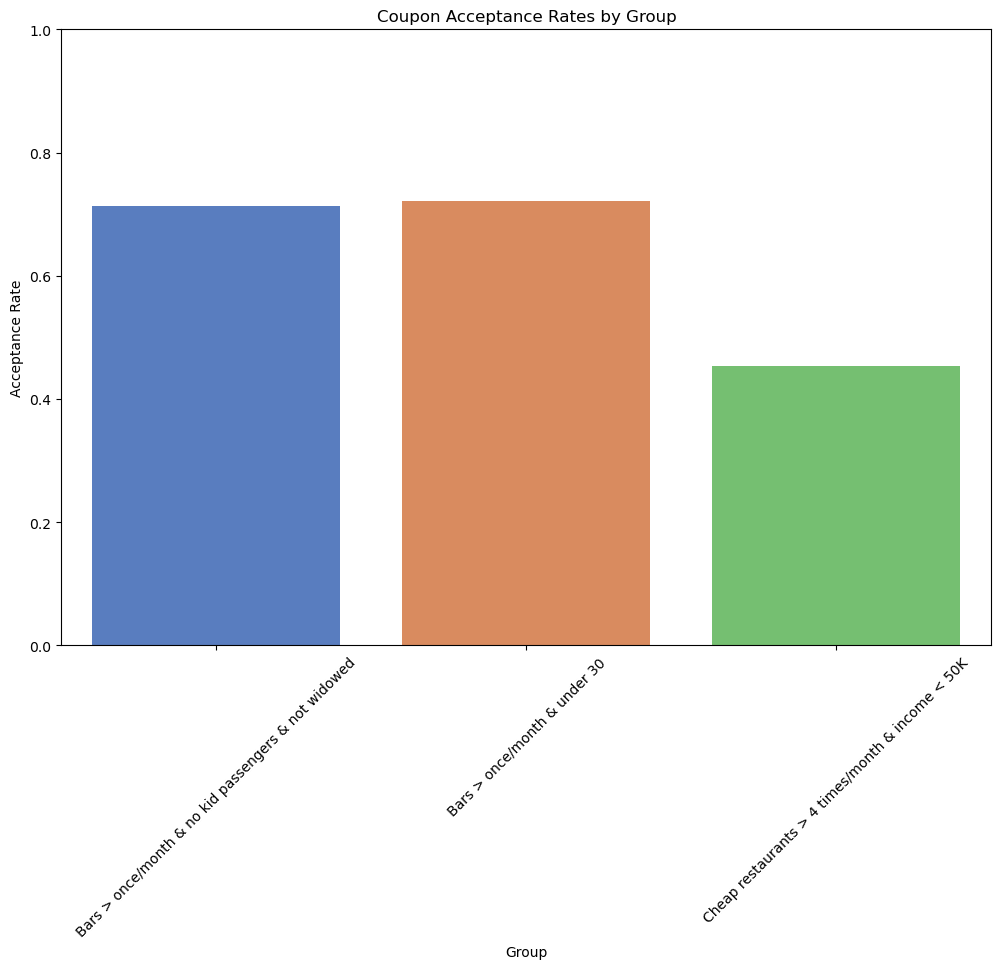

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 72%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: 45%


In [16]:
# Create DataFrame for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_1 = bar_coupons_df.query('Bar in ["1~3", "4~8", "gt8"] & passanger != "Kid(s)" & maritalStatus != "Widowed"')

# Create DataFrame for drivers who go to bars more than once a month and are under the age of 30
group_2 = bar_coupons_df.query('Bar in ["1~3", "4~8", "gt8"] & age in ["below21", "21", "26"]')

# Create DataFrame for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K
group_3 = bar_coupons_df.query('RestaurantLessThan20 in ["4~8", "gt8"] & income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
acceptance_rate_group_3 = group_3['Y'].mean()

# Create a DataFrame for visualization
acceptance_rates = pd.DataFrame({
    'Group': [
        'Bars > once/month & no kid passengers & not widowed', 
        'Bars > once/month & under 30', 
        'Cheap restaurants > 4 times/month & income < 50K'
    ],
    'Acceptance Rate': [
        acceptance_rate_group_1, 
        acceptance_rate_group_2, 
        acceptance_rate_group_3
    ]
})

# Create a bar plot to visualize the comparison
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette='muted')  # Create a bar plot
plt.title('Coupon Acceptance Rates by Group')  # Set the title of the plot
plt.xlabel('Group')  # Set the label for the x-axis
plt.ylabel('Acceptance Rate')  # Set the label for the y-axis
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 to represent proportions
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Display the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {round(acceptance_rate_group_1 * 100)}%")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {round(acceptance_rate_group_2 * 100)}%")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: {round(acceptance_rate_group_3 * 100)}%")

# Observation:
# - The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71%.
# - The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 72%.
# - The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K is 45%.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
## Hypothesis Based on the Observations and Analysis

# Drivers who are regular bar-goers and are socially active, as indicated by having adult passengers or being younger than 30, are more likely to accept bar coupons. 
# This tendency is stronger among those who are not widowed and have established habits and preferences for socializing at bars. 
# Older drivers with frequent bar visits may also exhibit a higher acceptance rate due to potentially higher disposable income and greater interest in bar-related activities. 
# However, lower-income drivers who frequently visit cheap restaurants show a relatively lower acceptance rate, indicating different priorities or preferences, suggesting a need for tailored marketing strategies for this demographic.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [17]:
## Create a new DataFrame for the Coffee House coupons

# Filter the DataFrame to include only rows where the 'coupon' column is related to Coffee House
coffee_coupons_df = data_cleaned.query("coupon == 'Coffee House'")

# Display the first few rows of the new DataFrame to verify the filtering
coffee_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


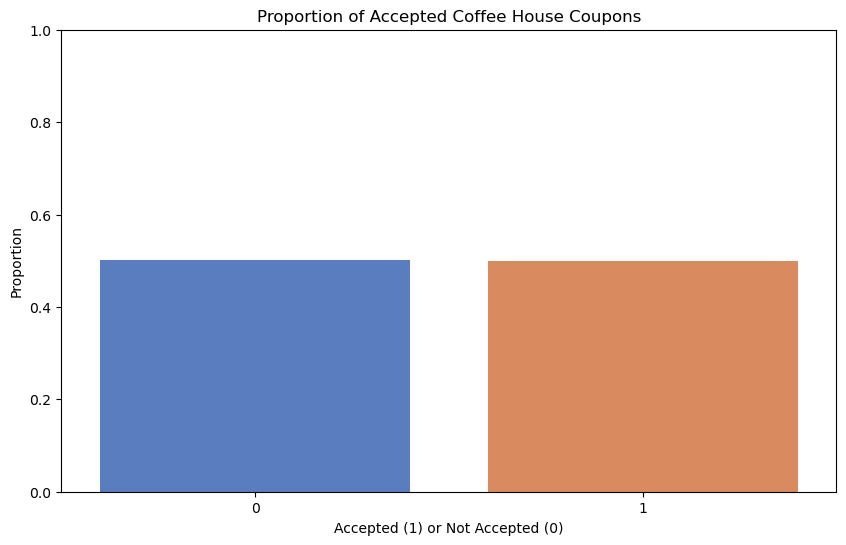

The proportion of Coffee House coupons that were accepted is: 50%


In [68]:
## What proportion of Coffee House coupons were accepted?

# Calculate the proportion of Coffee House coupons that were accepted
coffee_coupons_accepted_rate = coffee_coupons_df['Y'].mean()

# Calculate the counts for accepted and not accepted Coffee House coupons
coffee_coupons_counts = coffee_coupons_df['Y'].value_counts(normalize=True).reset_index()
coffee_coupons_counts.columns = ['Accepted', 'Proportion']

# Create a bar plot for the acceptance of Coffee House coupons
plt.figure(figsize=(10, 6))
sns.barplot(x='Accepted', y='Proportion', data=coffee_coupons_counts, palette='muted')
plt.title('Proportion of Accepted Coffee House Coupons')
plt.xlabel('Accepted (1) or Not Accepted (0)')
plt.ylabel('Proportion')
plt.ylim(0, 1) 
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

# Display the proportion
print(f"The proportion of Coffee House coupons that were accepted is: {round(coffee_coupons_accepted_rate * 100)}%")

In [18]:
## Investigate characteristics of passengers who accepted Coffee House coupons

# Analyze the demographics of passengers who accepted the Coffee House coupons
accepted_coffee_coupons = coffee_coupons_df.query('Y == 1')

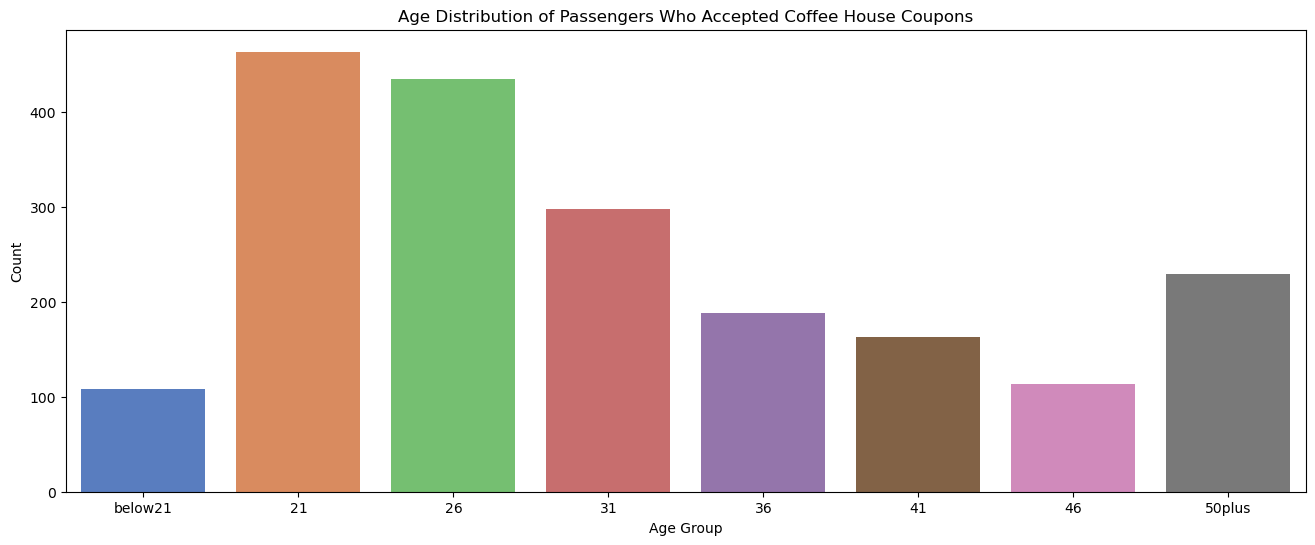

In [19]:
# Sort age categories logically
age_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]

# Plot the age distribution of those who accepted coffee house coupons
plt.figure(figsize=(16, 6))
sns.countplot(x='age', data=accepted_coffee_coupons, palette='muted', order=age_order)
plt.title('Age Distribution of Passengers Who Accepted Coffee House Coupons')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Observations:
# - The majority of the passengers who accepted coffee house coupons fall in the age groups of 21 and 26.
# - The age groups of 31 and 50plus also have a significant number of acceptances.
# - Age groups 36, 41, 46, and below21 have fewer acceptances compared to other age groups.

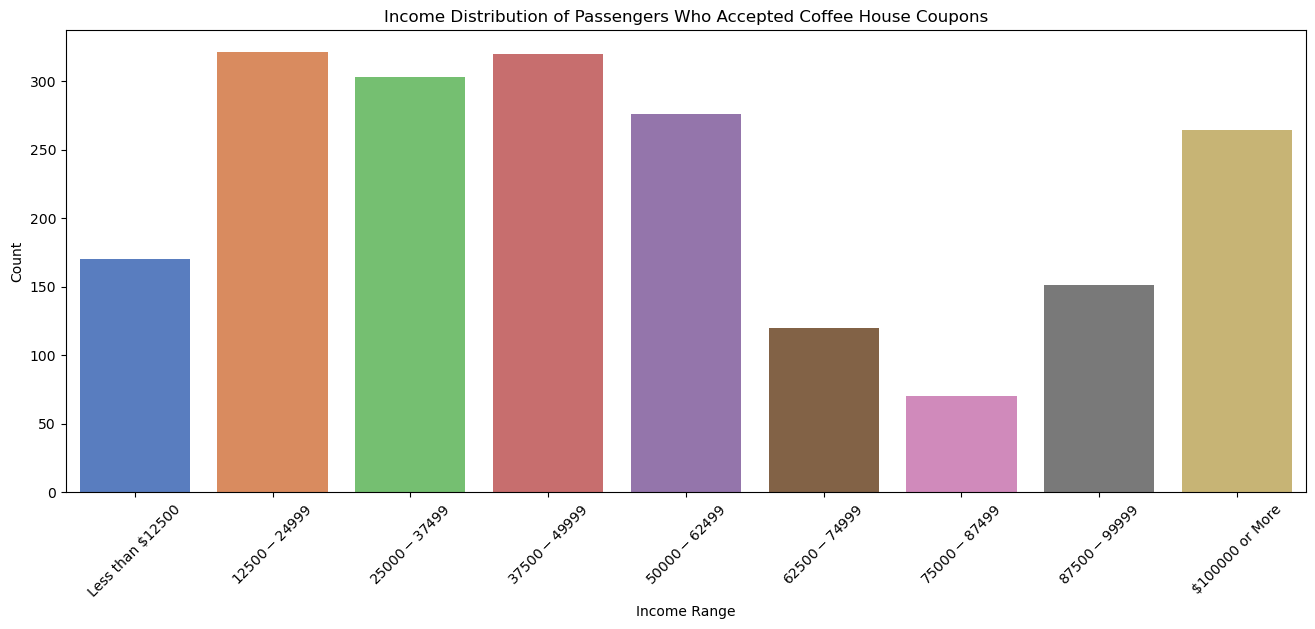

In [20]:
# Sort income categories logically
income_order = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", 
                "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", 
                "$100000 or More"]

# Plot the income distribution of those who accepted coffee house coupons
plt.figure(figsize=(16, 6))
sns.countplot(x='income', data=accepted_coffee_coupons, palette='muted', order=income_order)
plt.title('Income Distribution of Passengers Who Accepted Coffee House Coupons')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Observations:
# - Most of the passengers who accepted coffee house coupons fall in the income ranges of $12500 - $24999, $25000 - $37499, and $37500 - $49999.
# - There is also a significant number of acceptances in the income ranges of $50000 - $62499 and $100000 or More.
# - The income range $75000 - $87499 has the least number of acceptances.

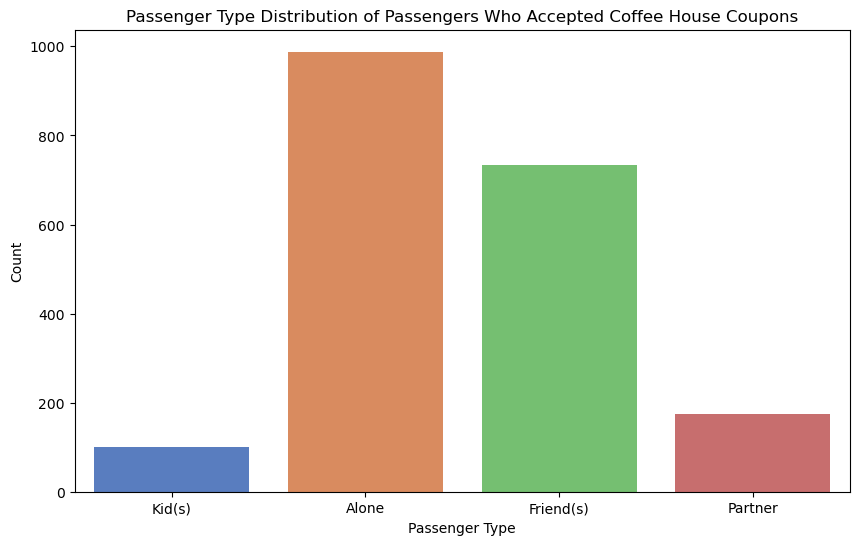

In [21]:
# Plot the distribution of passenger type among those who accepted Coffee House coupons
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', data=accepted_coffee_coupons, palette='muted')
plt.title('Passenger Type Distribution of Passengers Who Accepted Coffee House Coupons')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.show()

# Observations:
# - Most of the passengers who accepted coffee house coupons were alone.
# - The next significant group is passengers with friends.
# - There are fewer acceptances among passengers with kids or partners.

In [ ]:
## Hypothesis Based on the Observations and Analysis

# Passengers who are likely to accept Coffee House coupons tend to be younger, particularly in their early twenties (21) and mid-twenties (26), 
# suggesting that younger individuals are more socially active and frequent coffee shops more often, making these coupons appealing to them.
# Additionally, passengers with moderate income levels (ranging from $12500 to $49999) are more inclined to accept Coffee House coupons. 
# This demographic finds the value proposition of coffee house discounts attractive due to their spending habits and financial priorities.

# Moreover, passengers who are alone or with friends exhibit a higher acceptance rate of Coffee House coupons. 
# Being alone or in the company of friends indicates a higher likelihood of making spontaneous decisions to visit coffee houses, thus increasing the acceptance rate of these coupons. 
# These observations suggest that marketing strategies should target younger, socially active individuals with moderate income levels, 
# particularly those who drive alone or with friends, to maximize the effectiveness of Coffee House coupon distribution.